# Multi_plots documentation:

This notebook demonstrates examples of multi-panel plotting ACS Hazard maps.

The functions required are in the acs_plotting maps module.

You will need to provide the xarray datasets to the functions as well as specifying the text labels and colorbar information etc..

All the following multi-panel plotting functions use the same plotting helper function which is the basis of plot_acs_hazard. 

The functions have a range of options to modify the plots. Some of these are required, many are optional. Here’s a list of the minimum things you will need to provide:

-	The data for different GWLs:
    -	ds_gwl12
    -	ds_gwl15
    -	ds_gwl20
    -	ds_gwl30
-	Descriptive titles:
    -	title
    -	date_range (subtitle eg the time range of your plots)
    -	baseline (if any of your data are anomalies)
    -	tick_labels (for categorical data only)
    -	cbar_label (title for colorbar)
    -	dataset_name 
    -	watermark (if this is the final publishable figure set watermark="")
-	color scale specifications:
    -	cmap (the colormap color scheme)
    -	ticks (the levels of the colormap normalisation. Set something consistent so that all the figures can share the one colorbar)
    -	cbar_extend ([“min”, “max”, “both”, “neither”] controls the arrows on the colorbar. Indicates whether or not there are physical values beyond the color scale provided.)
-	save the figure:
    -	outfile defines the file that the figure is saved to.
There are many options within the plotting function that can modify the plot for different purposes. Most of the time, the default options will not need to be changed to produce a good figure.
-	Change region outlines:
    -	name use this to draw borders from different shapefiles:
    	["aus_local_gov",
    	"aus_states_territories",
    	"australia", 
    	"broadacre_regions", 
    	"NCRA_Marine_region",
    	"ncra_regions", 
    	"NCRA_regions_coastal_waters_GDA94", 
    	"nrm_regions",
    	"plantations"]
    -	Regions to specify your own regions outlines from a geopandas.GeoDataFrame
-	Mask different areas:
    -	By default the (~ocean) area outside of Australia is masked. If you want to show hazard information over the ocean set mask_not_australia = False
    -	If you want to show hazard information over the ocean, you may want to mask the Australian land area using mask_australia = True
    -	If you want to fill in your regions with color, eg you are only plotting point station data, you can specify the colour using facecolor=”lightgrey”
    -	If your data is dodgy due to limited ACGD observations in remote inland Australia, (eg rainfall related hazard data) you can mask this area using agcd_mask=False
    -	If your colormap and agcd_mask are incompatible, you may want to change the default missing data color from “lightgrey”. For example, change cmap_bad=”white”.
    -	Select one or more regions/states to show the data only for these selected regions using select_area. Fill in the non-selected areas using land_shadow=True.
-	Plotting ocean data
    -	If you want to show hazard information over the ocean set mask_not_australia = False
    -	If you want to show hazard information over the ocean, you may want to mask the Australian land area using mask_australia = True
    -	You may want to change the projection using crs
    -	Change the lat lon limits to encompass a larger region: xlim, ylim
-	Make adjustments to the figure:
    -	Change the figure size or aspect using figsize
    -	Change the projection using crs
    -	Change the lat lon limits to encompass a different region: xlim, ylim
    -	Change the regions edgecolor and area_linewidth
    -	Select one or more regions/states to show the data only for these selected regions using select_area. Fill in the non-selected areas using land_shadow=True.
    -	Change the watermark text and watermark_color
    -	Smooth the gridded data using contourf and/or outline the contour edges in grey using contour. Only recommended for relatively coarse gridded data, otherwise takes a lot of computation. Errors may occur using contourf and contour and certain projections (including the default lambertConformal projection) 
-	Options only available for plot_acs_hazard (soon to be added to multipanel plotting)
    -	Station_df dataframe with lat lon and variable columns to plot point based data, eg tide gauge data.
    -	Stippling xarray dataarray with a True/False mask to stipple over areas of significance or robustness.

*plot_acs_hazard_4pp* takes four xarray dataarrayts with shared colormaps and plots them in one of three arrangements. These arrangements are “vertical” (1-by-4), “horizontal” (4-by-1), and “square” (2-by-2). The arrangement you want will likely depend on your intended presentation format, eg Poster, powerpoint, print. The assumption is that the four plots represent the same hazard for four different global warming levels (GWLs).

*plot_acs_hazard_1plus3* takes four xarray dataarrays which are all plotting the same hazard for four different global warming levels (GWLs). However, the first panel shows the baseline GWL1.2 and the following three plots show the anomaly from that baseline. The first panel has a different colorbar to the three future scenario anomalies.

If you are only interested in the three future scenarios, then you may use the plot_acs_hazard_3pp function. It takes three xarray dataarrays with shared colorbars and labels and plots them in a shared figure. At the moment, these figures only have horizontal alignment.





In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 8.34 s, sys: 1.03 s, total: 9.36 s
Wall time: 10.5 s


CPU times: user 3min 26s, sys: 548 ms, total: 3min 26s
Wall time: 3min 26s


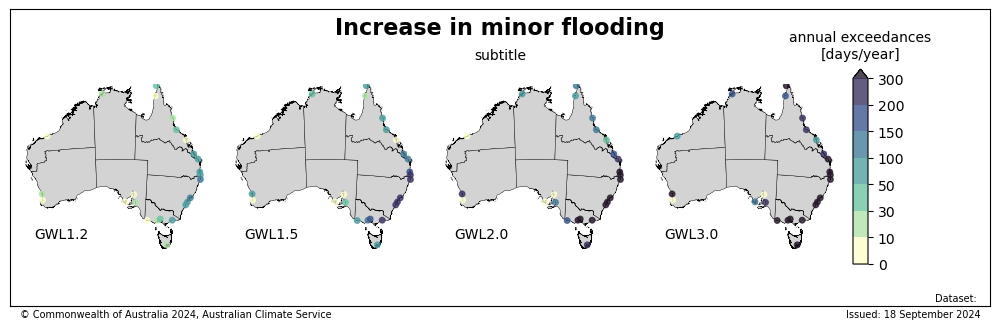

In [4]:
%%time 

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")

plot_acs_hazard_4pp(station_df_gwl12=df[["lat", "lon", "0.2m 50th percentile"]].sort_values("0.2m 50th percentile"),
                    station_df_gwl15=df[["lat", "lon", "0.38m 50th percentile"]].sort_values("0.38m 50th percentile"),
                    station_df_gwl20=df[["lat", "lon", "0.6m 50th percentile"]].sort_values("0.6m 50th percentile"),
                    station_df_gwl30=df[["lat", "lon", "1.0m 50th percentile"]].sort_values("1.0m 50th percentile"),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=[0,10,30,50,100, 150,200, 300],
                    cbar_extend="max",
                    title = "Increase in minor flooding",
                    date_range = "subtitle",
                    cbar_label = "annual exceedances\n[days/year]",
                    dataset_name = "",
                    watermark=None,
                    facecolor="lightgrey",
                    
                    );

CPU times: user 2min 10s, sys: 236 ms, total: 2min 10s
Wall time: 2min 10s


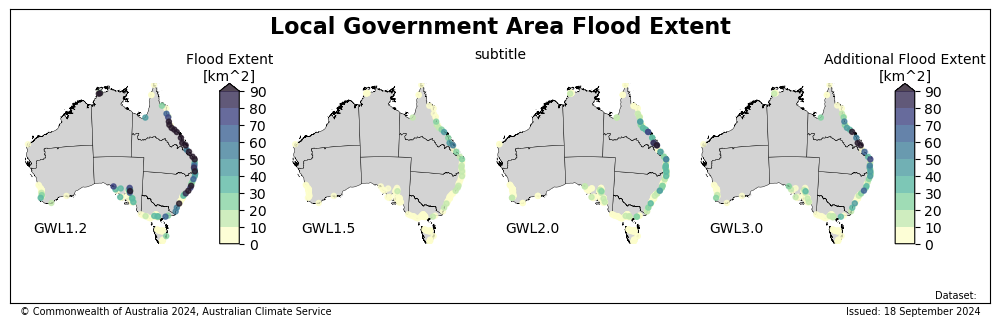

In [25]:
%%time 

var = "ext_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_extents/inundation_stats/results_2020_change.csv")

plot_acs_hazard_1plus3(station_df_gwl12=df.where(df["gwli"]==1.2)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl15=df.where(df["gwli"]==1.5)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl20=df.where(df["gwli"]==2.0)[["lat", "lon", var]].sort_values(var),
                    station_df_gwl30=df.where(df["gwli"]==3.0)[["lat", "lon", var]].sort_values(var),
                         gwl12_cmap=cmap_dict["pr_1"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "Flood Extent\n[km^2]",
                         gwl12_ticks= np.arange(0,100,10),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=np.arange(0,100,10),
                    cbar_extend="max",
                    title = "Local Government Area Flood Extent",
                    date_range = "subtitle",
                    cbar_label = "Additional Flood Extent\n[km^2]",
                    dataset_name = "",
                    watermark=None,
                    facecolor="lightgrey",
                    );

In [3]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]



CPU times: user 3.78 s, sys: 1.59 s, total: 5.38 s
Wall time: 7.94 s


In [4]:
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")["fire_climate_class"]
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")["fire_climate_class"]
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")["fire_climate_class"]

CPU times: user 3min 30s, sys: 379 ms, total: 3min 31s
Wall time: 3min 31s


(<Figure size 800x600 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x150362b0bfa0>)

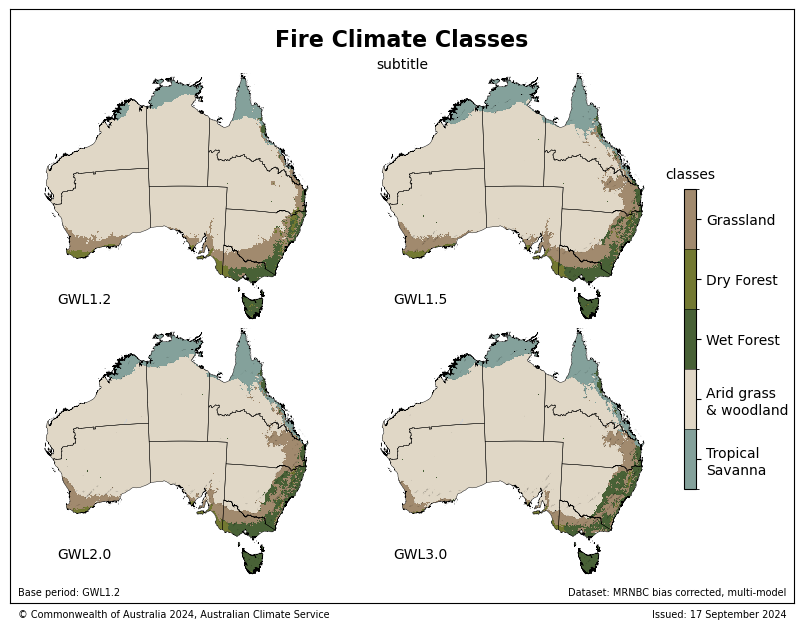

In [7]:
%%time
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                        stippling_gwl15 = stippling_gwl15,
                        stippling_gwl20 = stippling_gwl20,
                        stippling_gwl30 = stippling_gwl30,
                        title = "Fire Climate Classes",
                        baseline="GWL1.2",
                        cmap = cmap_dict["fire_climate"],
                        ticks = tick_dict["fire_climate_ticks"],
                        tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                        cbar_label = "classes",
                        dataset_name = "MRNBC bias corrected, multi-model",
                        watermark="",
                        date_range="subtitle",
                       orientation="square",
                        )

(<Figure size 500x1200 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x151411249330>)

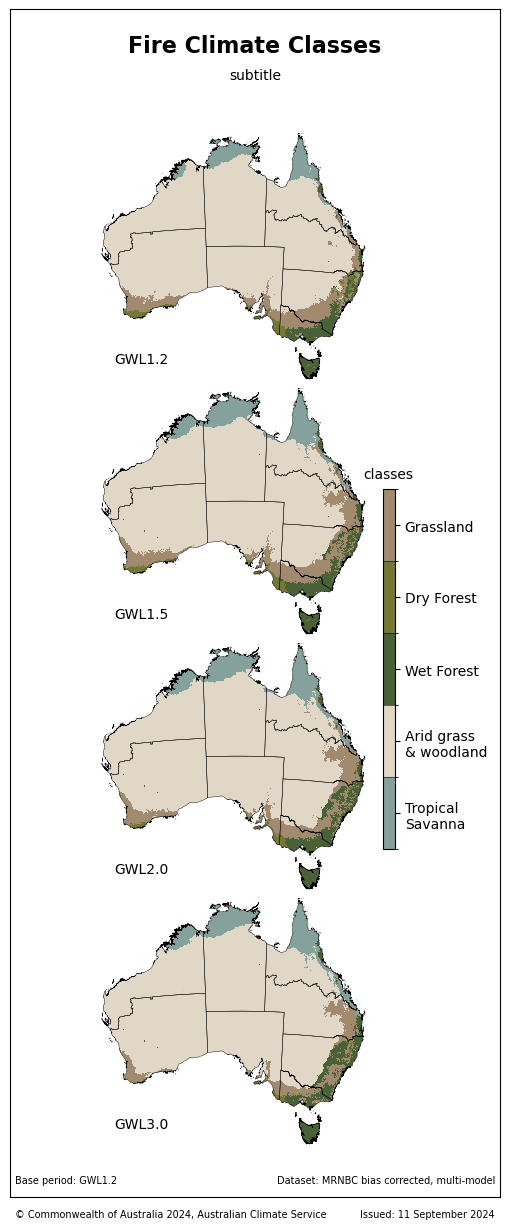

In [7]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    orientation="vertical",
                    )

(<Figure size 1000x300 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x153582fa1870>)

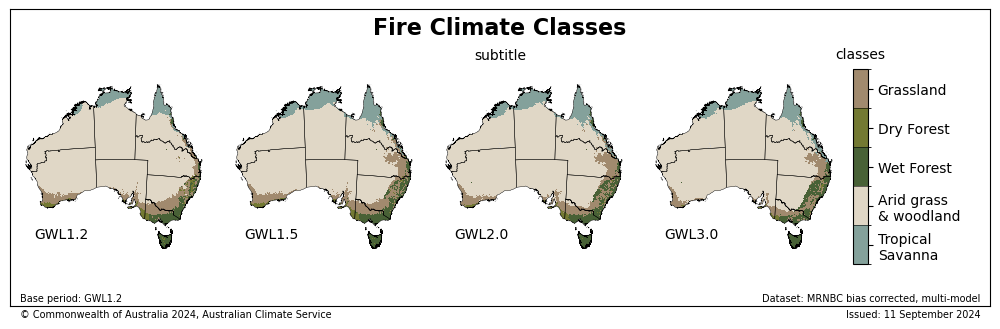

In [4]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    orientation="horizontal",
                    )

CPU times: user 2min 20s, sys: 296 ms, total: 2min 20s
Wall time: 2min 20s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

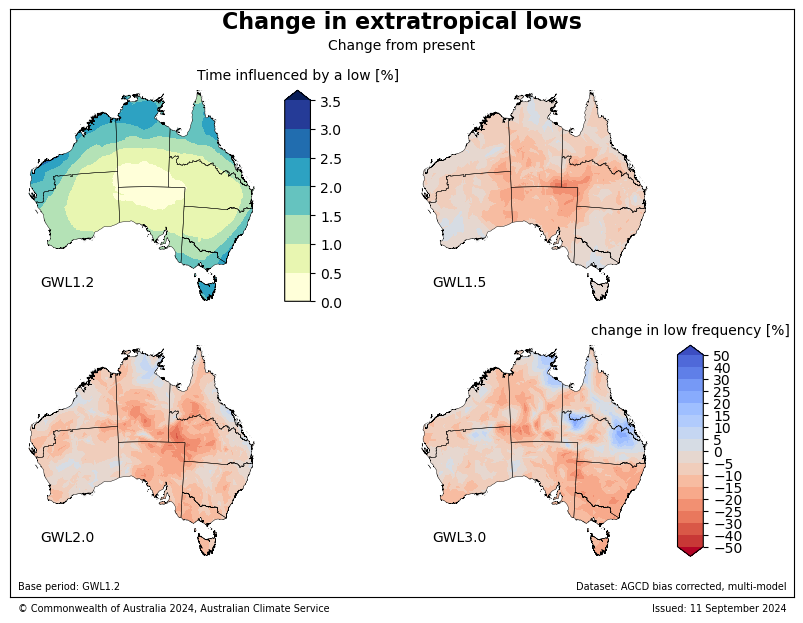

In [10]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square"
                        )

CPU times: user 2min 23s, sys: 375 ms, total: 2min 24s
Wall time: 2min 24s


(<Figure size 1000x300 with 5 Axes>, <GeoAxes: >)

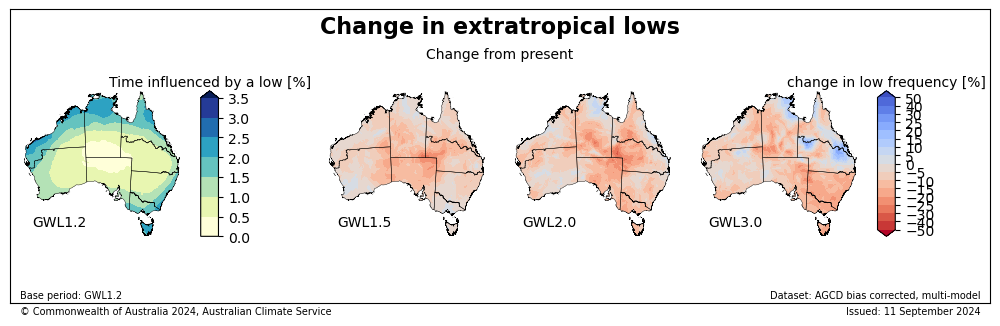

In [11]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="horizontal"
                        )

CPU times: user 2min 22s, sys: 311 ms, total: 2min 22s
Wall time: 2min 22s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

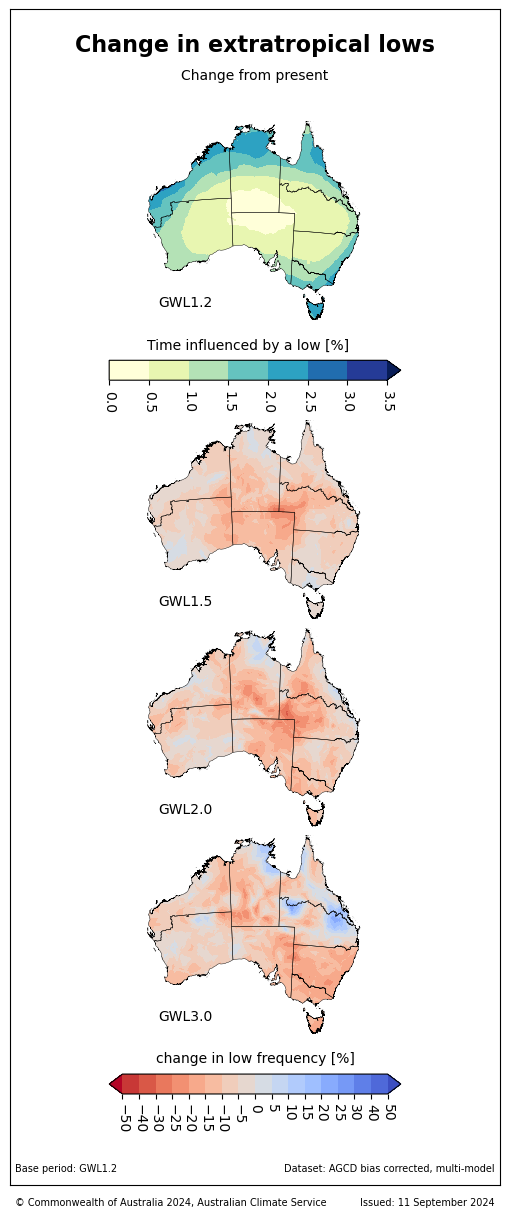

In [12]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical"
                        )